# Xi Correlation vs Correlations

- Xi Correlation hesaplanmasının baz alındığı makale:
- https://arxiv.org/abs/1909.10140
- Chatterjee, Sourav. "A new coefficient of correlation." Journal of the American Statistical Association 116.536 (2021): 2009-2022.

### Gerekli kütüphaneler ve yükleme yöntemleri
```Python
!pip install numpy # Array işlemlerini gerçekleştirmek için gerekli kütüphane
!pip install scipy # Pearson, Spearman gibi korelasyon methodlarını hesaplamak için kütüphane
!pip install xicor # Xi Korelasyonunu hesaplamak için gerekli kütüphane
!pip install matplotlib # Görselleştirme kütüphanesi
```

#### Kütüphanelerin Import Edilmesi

In [1]:
import numpy as np
from scipy import stats
from xicor.xicor import Xi
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import Polynomial

#### Xi Korelasyon Kullanımı

In [2]:
## Random noise için seed belirliyoruz
np.random.seed(42)

In [3]:
## Veri içeren iki numpy listesi oluşturuyoruz
noise = 0.1
x = np.linspace(-10, 10, 1000)  
y = (x + (noise * np.random.randn(1000))) ** 2

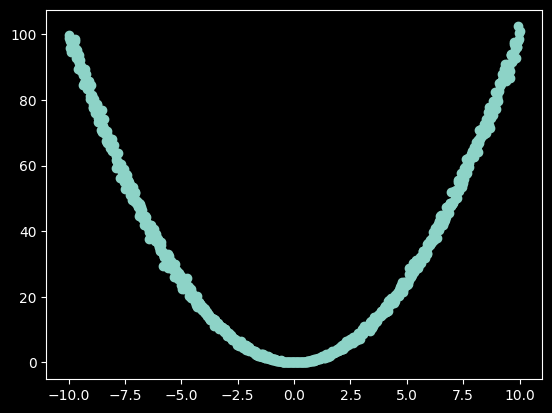

In [4]:
## Oluşturduğumuz örnek veriyi görselleştiriyoruz
plt.scatter(x,y)
plt.show()

In [5]:
## Xi Korelasyonu için Xi class'ını x ve y listeleriyle çağırıyoruz
xi_obj = Xi(x,y)

In [6]:
## Oluşturduğumuz object'in correlation method'unu çağırırarak hesaplıyoruz
xi_obj.correlation

0.9657549657549658

In [7]:
## Xi korelasyonunun p value'sunu hesaplamak isterseniz pval_asymptotic'i kullanabilirsiniz
''' 
pval_asymptotic fonksiyonu:
Parameters:

    ties: default: False, bool
        Eğer `ties` True ise, algoritma değişkenler arasında eş değerlerin olduğunu 
        varsayar ve P-değerini hesaplamak için daha ayrıntılı teoriyi kullanır. Aksi 
        takdirde, daha basit teoriyi kullanır. Eş değerler olmasa bile `ties` True 
        olarak ayarlamanın bir zararı yoktur.

    nperm: default: 1000, Int
        Eğer permütasyon testi gerekirse diye permütasyon sayısı.

Returns:

    p_value: float

'''
xi_obj.pval_asymptotic(ties=True, nperm=1000,)

0.0

#### Farklı Dağılımlardaki Örnek Verilerin Oluşturulması

In [8]:
## Rastgeleliklerin tekrarlanabilmesi için seed belirlenmesi
np.random.seed(42)

## M şeklindeki datanın oluşturulması
def create_m_shape_data(num_points=1000, noise=0.15):
    x1 = np.linspace(0, 0.25, num_points // 4)
    y1 = 1 - 4 * x1 + noise * np.random.randn(num_points // 4)

    x2 = np.linspace(0.25, 0.5, num_points // 4)
    y2 = 4 * (x2 - 0.25) + noise * np.random.randn(num_points // 4)

    x3 = np.linspace(0.5, 0.75, num_points // 4)
    y3 = 1 - 4 * (x3 - 0.5) + noise * np.random.randn(num_points // 4)

    x4 = np.linspace(0.75, 1, num_points // 4)
    y4 = 4 * (x4 - 0.75) + noise * np.random.randn(num_points // 4)

    x = np.concatenate([x1, x2, x3, x4])
    y = np.concatenate([y1, y2, y3, y4])

    return x, y

## U şeklindeki datanın oluşturulması
def create_u_shape_data(num_points=1000, noise=0.15):
    x = np.linspace(-1, 1, num_points)
    y = x**2 + noise * np.random.randn(num_points)
    return x, y

## Düz çizgi şeklindeki datanın oluşturulması
def create_line_data(num_points=1000, noise=0.15):
    x = np.linspace(-10, 10, num_points)
    y = 0.1 * x + noise * np.random.randn(num_points)
    return x, y

## Ters U şeklindeki datanın oluşturulması
def create_reverse_u_shape_data(num_points=1000, noise=0.15):
    x = np.linspace(-1, 1, num_points)
    y = -x**2 + 1 + noise * np.random.randn(num_points)
    return x, y

#### Görselleştirmelerin ve Korelasyonların Oluşturulması

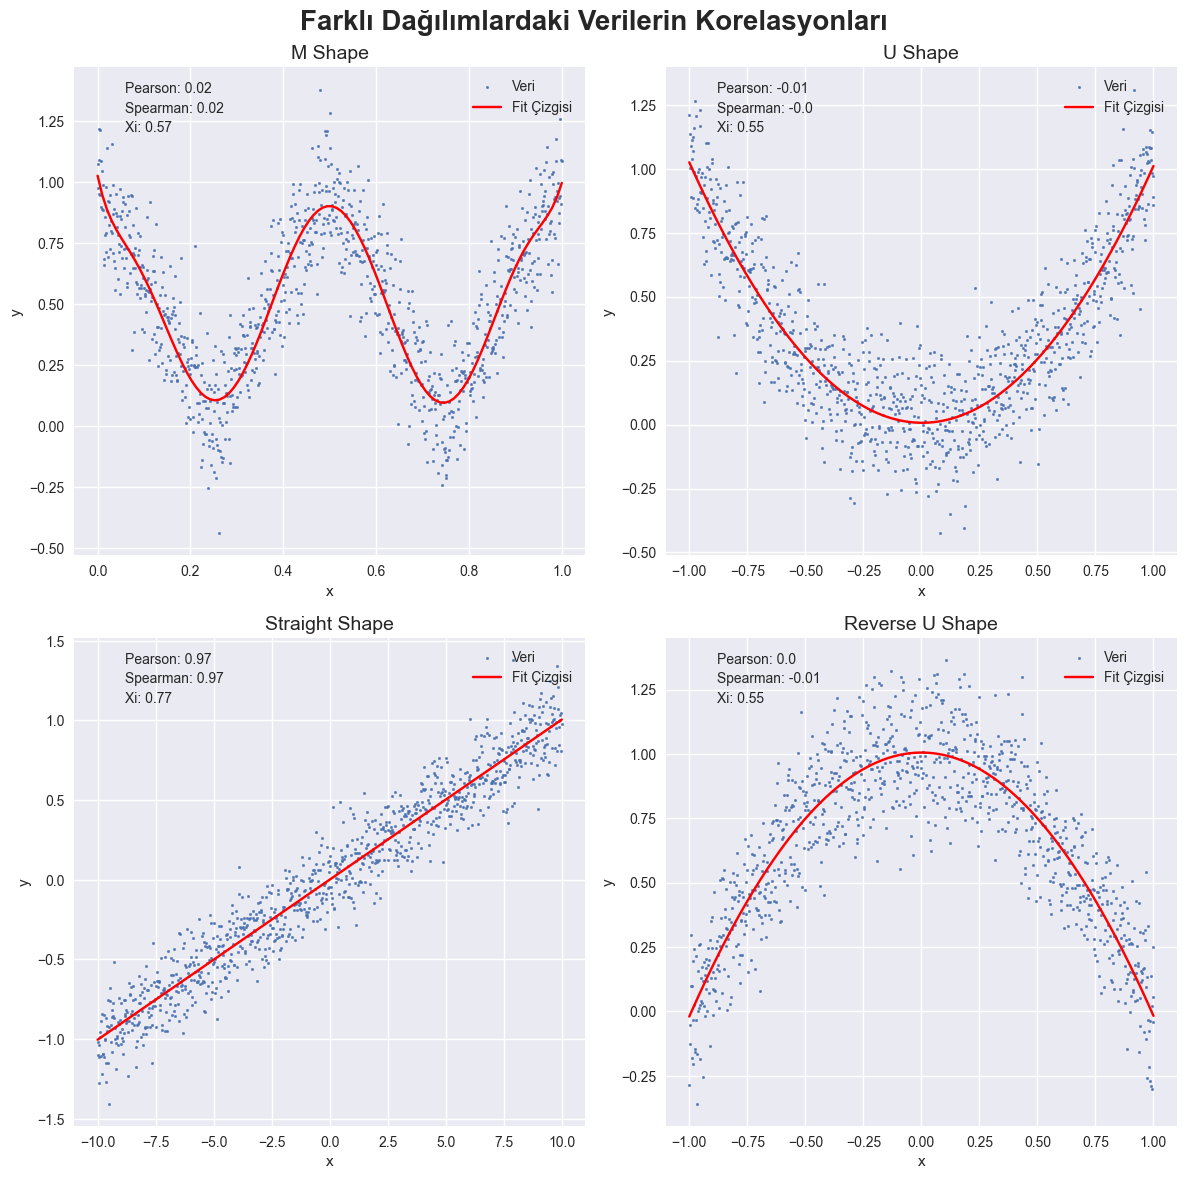

In [9]:
## Verilerin korelasyonlarının hesaplanması
def corr_calculator(x, y):

    corrs = dict()
    corrs["pearson"] = np.round(stats.pearsonr(x,y)[0],2)
    corrs["spearman"] = np.round(stats.spearmanr(x,y)[0],2)
    corrs["xi"] = np.round(Xi(x,y).correlation,2)

    return corrs


## Verilerin görselleştirmesi
def figure_show(x, y, ax, poly_deg, shape_name):

    p = Polynomial.fit(x, y, deg=poly_deg)

    corrs = corr_calculator(x, y)

    ax.scatter(x, y, s=3, label="Veri")
    ax.plot(*p.linspace(), color='red', label="Fit Çizgisi")

    ax.text(.1, .97, f"Pearson: {corrs['pearson']}", ha='left', va='top', transform=ax.transAxes)
    ax.text(.1, .93, f"Spearman: {corrs['spearman']}", ha='left', va='top', transform=ax.transAxes)
    ax.text(.1, .89, f"Xi: {corrs['xi']}", ha='left', va='top', transform=ax.transAxes)

    ax.set_title(f'{shape_name} Shape', size=14)
    ax.set_xlabel('x')
    ax.set_ylabel('y')

    ax.legend(loc="upper right")


## Rastgele verilerin oluşturulması
x_m, y_m = create_m_shape_data()
x_u, y_u = create_u_shape_data()
x_straight, y_straight = create_line_data()
x_reverse_u, y_reverse_u = create_reverse_u_shape_data()

## Grafik ayarları
plt.style.use('seaborn-v0_8')

## Suplotların hazırlanması
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

## M şeklinin eklenmesi
figure_show(x_m, y_m, axes[0, 0], 8, "M")

## U şeklinin eklenmesi
figure_show(x_u, y_u, axes[0, 1], 2, "U")

## Düz çizginin eklenmesi
figure_show(x_straight, y_straight, axes[1, 0], 1, "Straight")

## Ters U şeklinin eklenmesi
figure_show(x_reverse_u, y_reverse_u, axes[1, 1], 2, "Reverse U")

plt.suptitle("Farklı Dağılımlardaki Verilerin Korelasyonları", size=20, weight=700)
plt.tight_layout(pad=1.2)
plt.show()